In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/'

def count_nans(df, col):
    print(df[df[col].isnull()].count())

In [4]:
!ls {PATH}

df		 rossmann.tgz		    store.csv	      test.csv.zip
googletrend.csv  sample_submission.csv	    store.csv.zip     train.csv
joined		 sample_submission.csv.zip  store_states.csv  train.csv.zip
joined_test	 state_names.csv	    test.csv	      weather.csv


# Create datasets

In [5]:
def concat_csv(dirname): #implementation used to get the above data set
    path = f'{PATH}{dirname}'
    filenames=glob(f"{PATH}/*.csv")
    
    wrote_header = False
    with open(f"{path}.csv","w") as outputfile: #??
            for filename in filenames:
                name = filename.split(".")[0]
                with open(filename) as f:
                    line = f.readline()
                    if not wrote_header:
                        wrote_header = True
                        outputfile.write("file,"+line)
                    for line in f:
                        outputfile.write(name + "," + line)
                    outputfile.write("\n")
        

In [5]:
# concat_csvs('googletrend')
# concat_csvs('weather')

In [6]:
table_names = ['train','store','store_states','state_names',
              'googletrend','weather','test']

Feature Space:

- train: Training set provided by competition
- store: List of stores
- store_states: mapping of store to the German state they are in
- List of German state names
- googletrend: trend of certain google keywords over time, found by users to correlate well w/ given data
- weather: weather
- test: testing set

In [7]:
tables = [pd.read_csv(f'{PATH}{fname}.csv',low_memory=False) for fname in table_names]

In [8]:
tables

[         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
 0            1          5  2015-07-31   5263        555     1      1   
 1            2          5  2015-07-31   6064        625     1      1   
 2            3          5  2015-07-31   8314        821     1      1   
 3            4          5  2015-07-31  13995       1498     1      1   
 4            5          5  2015-07-31   4822        559     1      1   
 5            6          5  2015-07-31   5651        589     1      1   
 6            7          5  2015-07-31  15344       1414     1      1   
 7            8          5  2015-07-31   8492        833     1      1   
 8            9          5  2015-07-31   8565        687     1      1   
 9           10          5  2015-07-31   7185        681     1      1   
 10          11          5  2015-07-31  10457       1236     1      1   
 11          12          5  2015-07-31   8959        962     1      1   
 12          13          5  2015-07-31   8821      

In [9]:
from IPython.display import HTML

In [10]:
#use head() to display tables
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
#summarize aggregate information to each able accross each field
# for t in tables: display(DataFrameSummary(t).summary())

# Date Cleaning/Feature Engineering

In [12]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [13]:
len(train),len(test)

(1017209, 41088)

In [14]:
#trun state Holiday to booleans
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

In [15]:
train.StateHoliday.head()

0    False
1    False
2    False
3    False
4    False
Name: StateHoliday, dtype: bool

In [16]:
#Pandas does joins using the merge method. The suffixes argument describes the naming convention for duplicate fields. 
#We've elected to leave the duplicate field names on the left untouched, and append a "_y" to those on the right.

def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on = left_on, right_on=right_on,
                            suffixes=('',suffix))

In [17]:
weather = join_df(weather, state_names, 'file', 'StateName')

In [18]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [19]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
#Use a boolean list to select all the NI values in the State column
#Using the .loc[rows, cols] feature to locate and replace selected values to 'HB,NI'
googletrend.loc[googletrend.State=='NI', 'State'] = 'HB,NI'

In [20]:
add_datepart(weather, 'Date', drop=False)
add_datepart(googletrend, 'Date', drop=False)
add_datepart(train, 'Date', drop=False)
add_datepart(test, 'Date', drop=False)

In [21]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [22]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [23]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]), len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [24]:
googletrend.head()

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600


In [25]:
joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,HE
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,...,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,BE
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,...,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,SN


In [26]:
joined = join_df(joined, googletrend, ['State', 'Year', 'Week'])
joined_test = join_df(joined_test, googletrend, ['State', 'Year', 'Week'])
len(joined[joined.trend.isnull()]), len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [27]:
joined = joined.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('','_DE'))
joined_test = joined_test.merge(trend_de, 'left', ['Year', 'Week'], suffixes=('','_DE'))
len(joined[joined.trend_DE.isnull()]), len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [28]:
joined = join_df(joined, weather, ['State','Date'])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]), len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [29]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [30]:
#dealing with missing values
for df in (joined, joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1)

In [31]:
for df in (joined, joined_test):
    df['CompetitionOpenSince'] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear,
                                                    month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [32]:
for df in (joined,joined_test): #?? Why assign value of zeros
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [33]:
for df in (joined, joined_test):## issue here, inconsistent result from original notebook
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [34]:
for df in (joined,joined_test):
    df['Promo2Since'] = pd.to_datetime(df.apply(lambda x: Week(
                    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [35]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [36]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

# Durations

In [37]:
def get_elapsed(fld, pre): #??
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [38]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [39]:
df = train[columns]

In [40]:
df = test[columns]

In [41]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [42]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [43]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [44]:
df = df.set_index("Date")

In [45]:
columns = ["SchoolHoliday", "StateHoliday", "Promo"]

In [46]:
for o in ["Before", "After"]:
    for p in columns:
        a = o + p
        df[a] = df[a].fillna(0).astype(int)

In [47]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [48]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [49]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [50]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [51]:
df.reset_index(inplace=True)

In [52]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [53]:
df.drop(columns,1,inplace=True)

In [54]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,0,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,0,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,0,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,0,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [55]:
df.to_feather(f'{PATH}df')

In [56]:
df = pd.read_feather(f'{PATH}df')

In [57]:
df["Date"] = pd.to_datetime(df.Date)

In [58]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [59]:
joined = join_df(joined, df, ['Store', 'Date'])

In [60]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [61]:
joined = joined[joined.Sales!=0]

In [62]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [63]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

# Create features

In [6]:
joined = pd.read_feather(f'{PATH}joined')
joined_test = pd.read_feather(f'{PATH}joined_test')

In [7]:
joined.head().T.head(40)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [8]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [9]:
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy() #?????

In [10]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [11]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [12]:
apply_cats(joined_test, joined)

In [13]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

## run on a sample

In [14]:
#run on a sample
idxs = get_cv_idxs(n, val_pct=150000/n) #validation percentage
joined_samp = joined.iloc[idxs].set_index("Date")
samp_size = len(joined_samp); samp_size

150000

## run on full dataset

In [45]:
#to run on full dataset
sample_size = n
joined_samp = joined.set_index("Date")
joined_samp.shape

(844338, 39)

In [46]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,False,24,0,c,a,...,24.0,11.0,1.0,85.0,83.0,0.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,False,24,25,a,a,...,14.0,11.0,4.0,80.0,83.0,0.0,0.0,1.0,1.0,6064


In [47]:
df, y, nas, mapper = proc_df(joined_samp, 'Sales', do_scale=True) #do_scale
yl = np.log(y)

In [48]:
joined_test = joined_test.set_index("Date")

KeyError: 'Date'

In [19]:
df_test, _, nas, mapper = proc_df(joined_test, "Sales", do_scale=True, skip_flds=['Id'], mapper=mapper, na_dict=nas)

In [49]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732492,1.724334,0.0,0.0,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294578,1.724334,0.0,0.0,1.113717,2.04105


In [50]:
train_ratio = 0.75
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [51]:
train_size, len(df)

(112500, 844338)

In [52]:
#Better option for picking validation set is using the exact same length of tie period oas the test set values
val_idx = np.flatnonzero( #flatnonzero returns indices that are non-zero in the falttened version of a
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1))) #only return Ture when both range conditions are satisfied

# Deep Learning

In [53]:
#Implement competition metrics --- root-mean-square pervent error in this case
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

## Modeldata object

In [54]:
#ModelData object ??
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128, test_df=df_test)

In [55]:
#show cardinality for each categories

cat_sz = [(c,len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [56]:
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 1),
 ('Promo_bw', 1),
 ('StateHoliday_fw', 1),
 ('StateHoliday_bw', 1),
 ('SchoolHoliday_fw', 1),
 ('SchoolHoliday_bw', 1)]

In [57]:
# set embeing sizes
emb_szs = [(c, min(50,(c+1)//2)) for _,c in cat_sz] #use roughly half the cardinality as the embeding matrix size
# _,c because cat_sz is a tuple e.g.('Store', 1116) and what we are interested in is the second value
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1)]

In [34]:
m = md.get_learner(emb_szs, len(df.columns) - len(cat_vars), 0.04, 1, [1000, 500], [0.001, 0.01], y_range = y_range)
lr = 1e-3

In [35]:
m.lr_find()

 60%|█████▉    | 670/1120 [00:08<00:05, 82.74it/s, loss=0.324] 


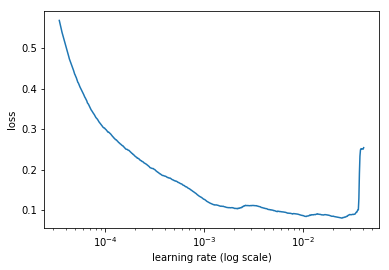

In [36]:
m.sched.plot(100)

## Sample

In [62]:
m = md.get_learner(emb_szs, len(df.columns) - len(cat_vars),
                  0.04, 1, [1000, 500], [0.001, 0.01], y_range = y_range)
lr = 1e-3

In [63]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.014089   0.021295   0.129942  
    1      0.011806   0.016502   0.120824                        
    2      0.010203   0.015588   0.119857                         



[array([0.01559]), 0.1198567494047878]

In [41]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.010296   0.013474   0.112145  
    1      0.009513   0.012977   0.11214                          
    2      0.009342   0.013095   0.111908                         
    3      0.009306   0.013023   0.112649                         
    4      0.008682   0.013234   0.114345                         



[array([0.01323]), 0.11434512689714119]

In [42]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.010718   0.014173   0.115072  
    1      0.008873   0.013927   0.118267                         
    2      0.007339   0.012774   0.113778                         
    3      0.006558   0.012617   0.112438                         
    4      0.01032    0.019577   0.153089                         
    5      0.007801   0.013147   0.118725                         
    6      0.006369   0.012889   0.11408                          
    7      0.005997   0.012658   0.113588                         



[array([0.01266]), 0.11358757128211414]

## All

In [60]:
m = md.get_learner(emb_szs, len(df.columns) - len(cat_vars),
                  0.04, 1, [1000, 500], [0.001, 0.01], y_range=y_range)
lr = 1e-3

In [61]:
m.fit(lr, 1, metrics=[exp_rmspe])

TypeError: 'module' object is not subscriptable

In [64]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.009813   0.017133   0.124261  
    1      0.008248   0.015283   0.121715                         
    2      0.008776   0.015498   0.121297                         



[array([0.0155]), 0.12129690642782659]

In [66]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.006108   0.013962   0.113754  
    1      0.006336   0.013518   0.111646                         
    2      0.006919   0.013953   0.1134                           



[array([0.01395]), 0.11340041852298481]

## Test

In [67]:
m = md.get_learner(emb_szs, len(df.columns) - len(cat_vars),
                  0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [68]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.014698   0.014288   0.113555  
    1      0.012173   0.014629   0.125514                        
    2      0.009847   0.012786   0.114577                         



[array([0.01279]), 0.11457740156719856]

In [69]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                        
    0      0.007137   0.011044   0.102224  
    1      0.007191   0.010912   0.101248                         
    2      0.007305   0.010799   0.100987                         



[array([0.0108]), 0.10098699530221293]

In [70]:
m.save('val0')

In [71]:
m.load('val0')

In [72]:
x,y = m.predict_with_targs()

In [73]:
exp_rmspe(x,y)

0.10428997777785391

In [74]:
pred_test=m.predict(True)

In [75]:
pred_test = np.exp(pred_test)

In [76]:
joined_test['Sales'] = pred_test

In [77]:
csv_fn=f'{PATH}tmp/sub.csv'

In [78]:
joined_test[['Id','Sales']].to_csv(csv_fn, index=False)

In [79]:
FileLink(csv_fn)

/home/paperspace/kaggle/competitions/rossmann-store-sales/data/tmp/sub.csv

# RF

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [82]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [83]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.9797295699030157,
 0.9228527263699181,
 0.9149876946486658,
 0.11937084479998575)